In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd

In [55]:
data=pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [56]:
data.shape

(1461, 6)

<Axes: xlabel='weather', ylabel='count'>

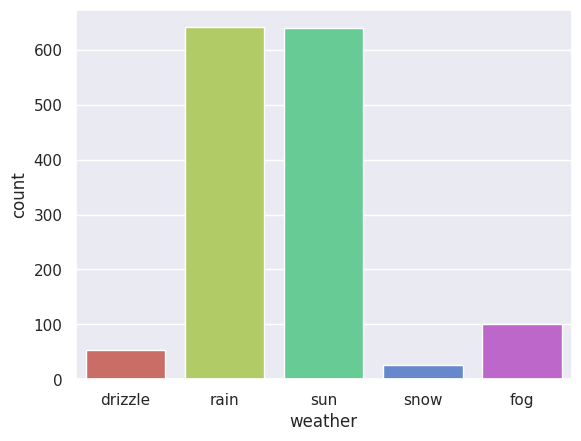

In [57]:
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather", data=data, palette='hls')


In [58]:
countrain=len(data[data.weather=='rain'])
countsun=len(data[data.weather=='sun'])
countdrizzle=len(data[data.weather=='drizzle'])
countsnow=len(data[data.weather=='snow'])
countfog=len(data[data.weather=='fog'])
print('percent of rain:{:2f}%'.format((countrain/(len(data.weather))*100)))
print('percent of sun:{:2f}%'.format((countsun/(len(data.weather))*100)))
print('percent of drizzle:{:2f}%'.format((countdrizzle/(len(data.weather))*100)))
print('percent of snow:{:2f}%'.format((countsnow/(len(data.weather))*100)))
print('percent of fog:{:2f}%'.format((countfog/(len(data.weather))*100)))

percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [59]:
data[['precipitation','temp_max','temp_min','wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

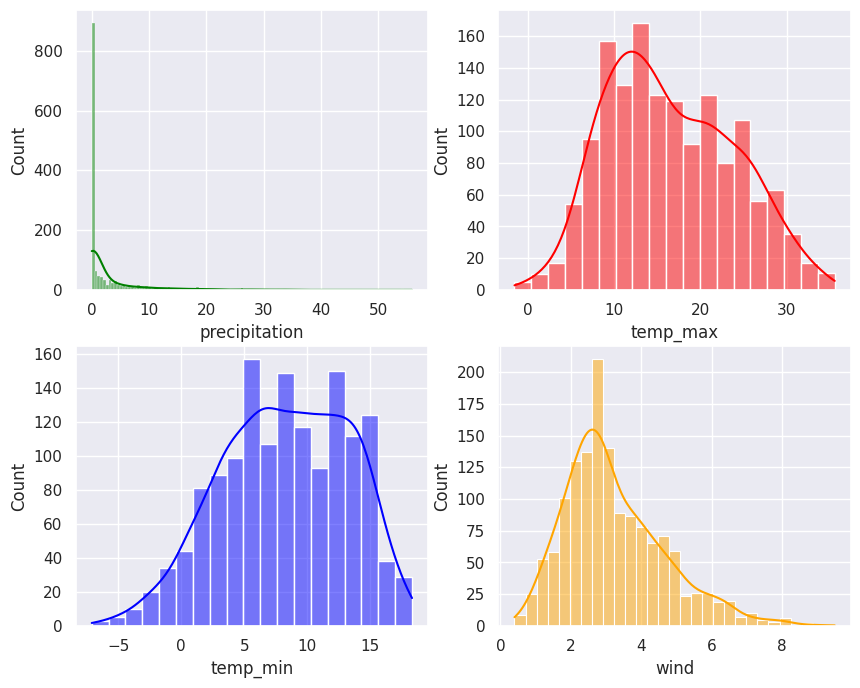

In [60]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x='precipitation',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x='temp_max',kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x='temp_min',kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x='wind',kde=True,ax=axs[1,1],color='orange')

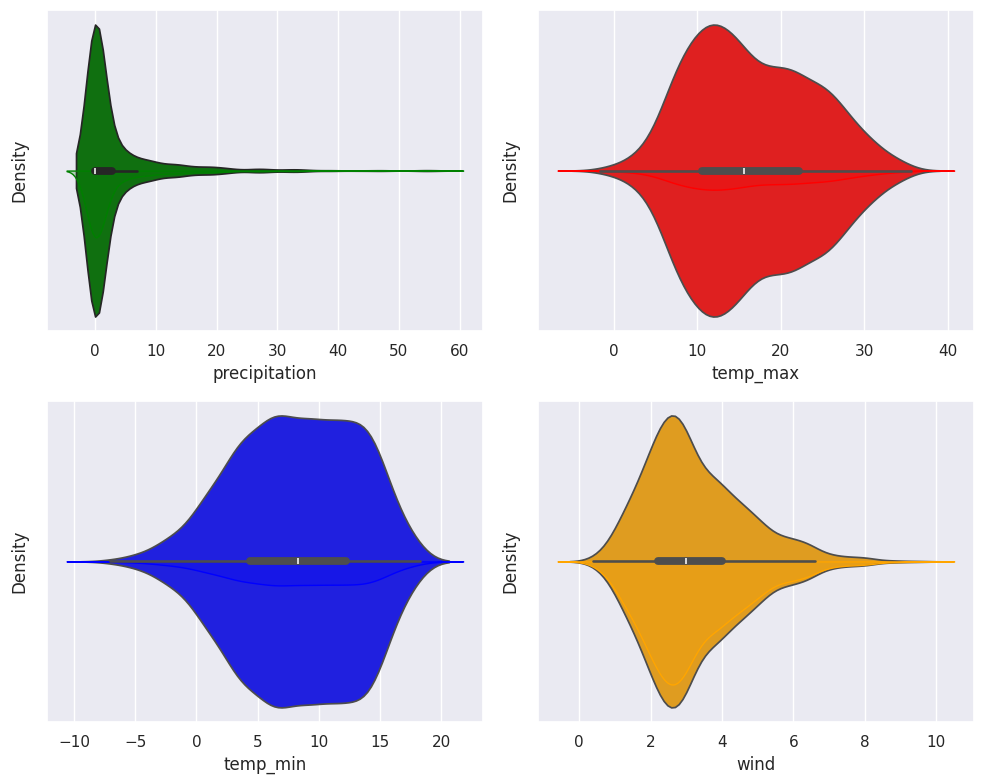

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.violinplot(data=data, x='precipitation', ax=axs[0, 0], color='green')
sns.kdeplot(data=data['precipitation'], ax=axs[0, 0], color='green', fill=True)

sns.violinplot(data=data, x='temp_max', ax=axs[0, 1], color='red')
sns.kdeplot(data=data['temp_max'], ax=axs[0, 1], color='red', fill=True)

sns.violinplot(data=data, x='temp_min', ax=axs[1, 0], color='blue')
sns.kdeplot(data=data['temp_min'], ax=axs[1, 0], color='blue', fill=True)

sns.violinplot(data=data, x='wind', ax=axs[1, 1], color='orange')
sns.kdeplot(data=data['wind'], ax=axs[1, 1], color='orange', fill=True)

plt.tight_layout()
plt.show()


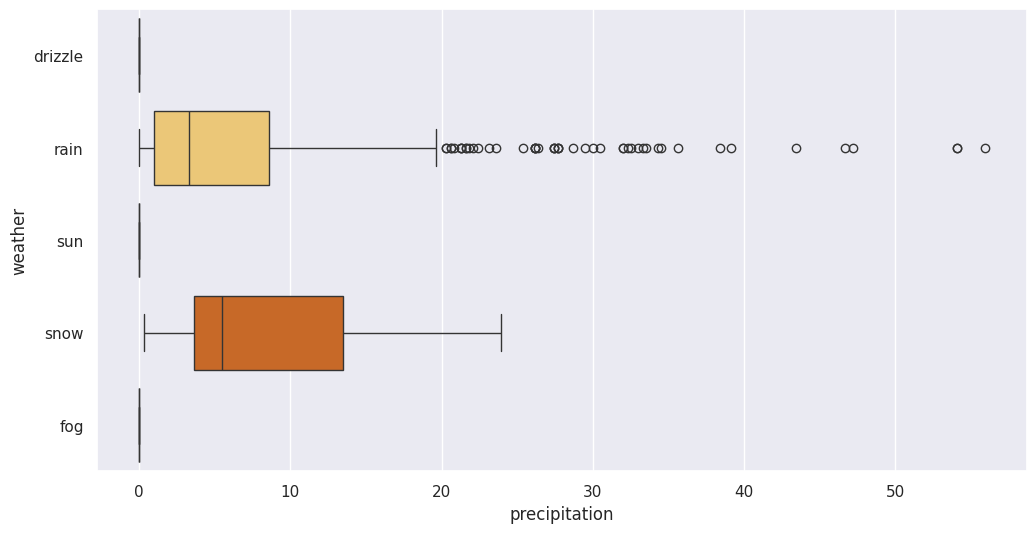

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='precipitation', y='weather', data=data, palette='YlOrBr')
plt.show()


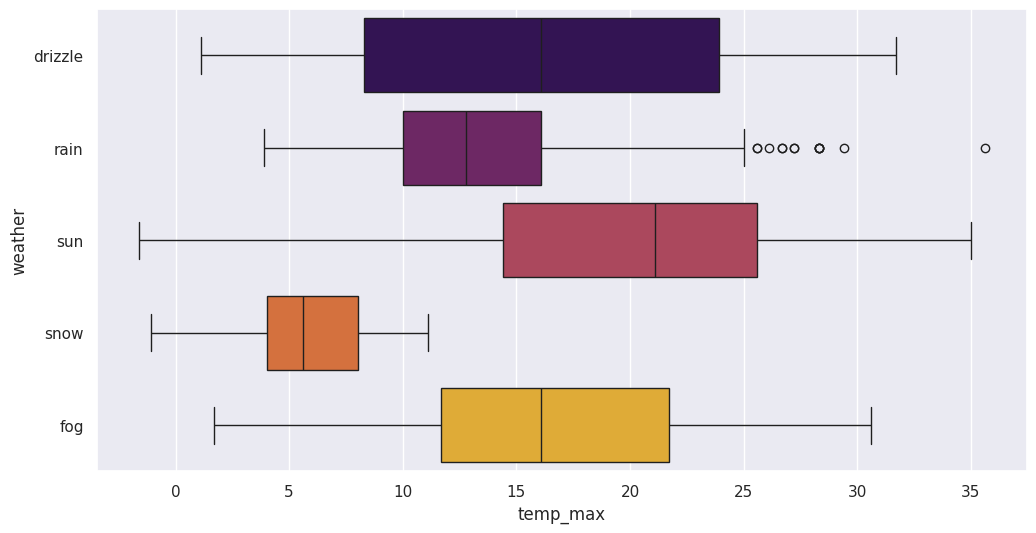

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_max', y='weather', data=data, palette='inferno')
plt.show()


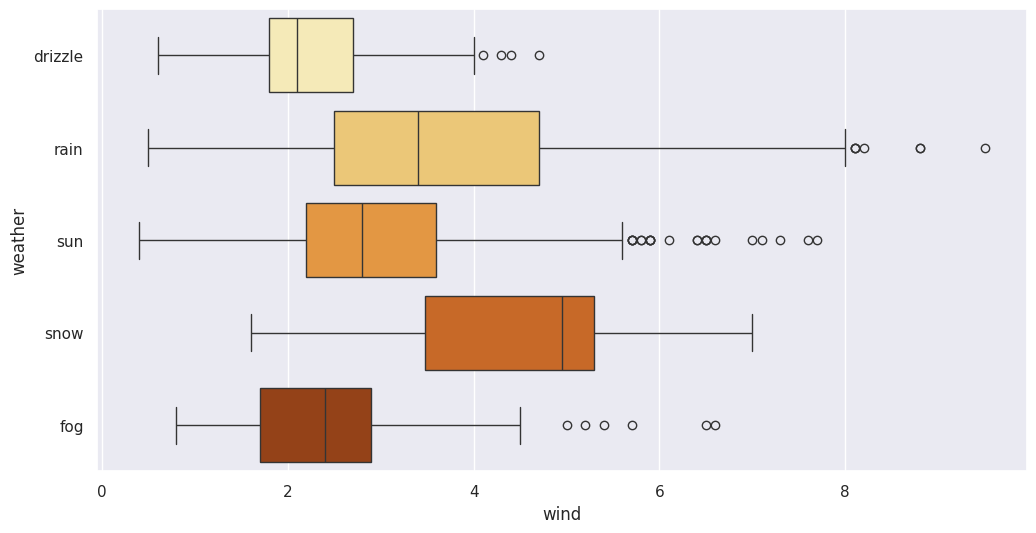

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='wind', y='weather', data=data, palette='YlOrBr')
plt.show()


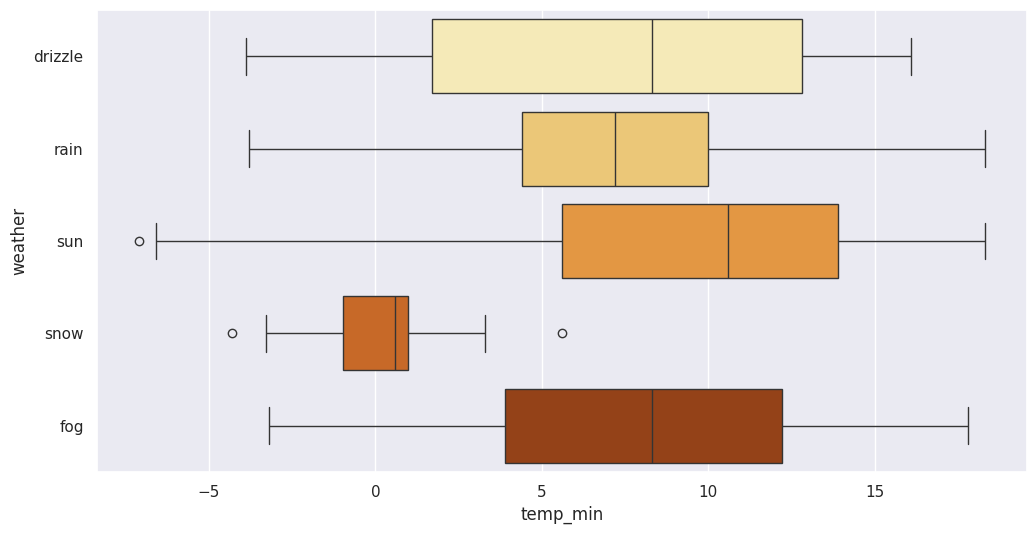

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_min', y='weather', data=data, palette='YlOrBr')
plt.show()


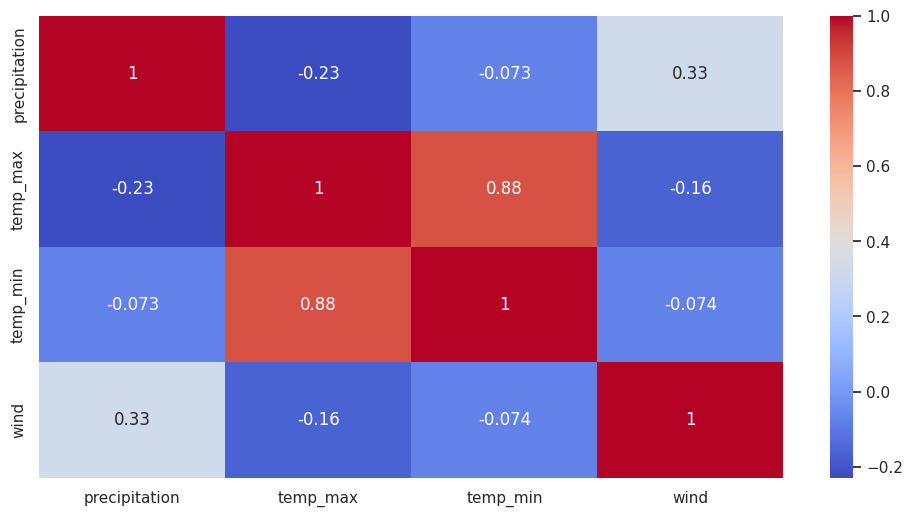

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


pearsons correlation:  -0.22855481643297046
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


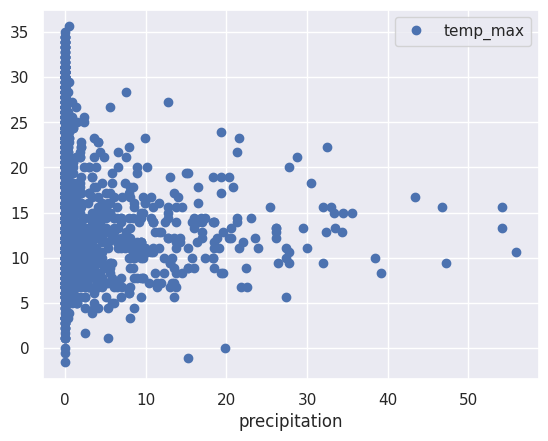

In [68]:
data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495486
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


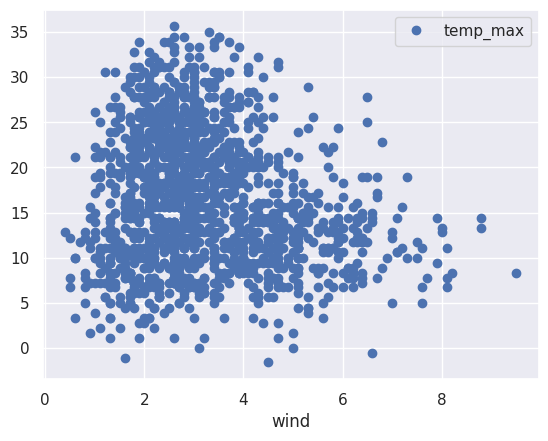

In [69]:
data.plot("wind",'temp_max',style='o')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))

<Axes: xlabel='temp_max'>

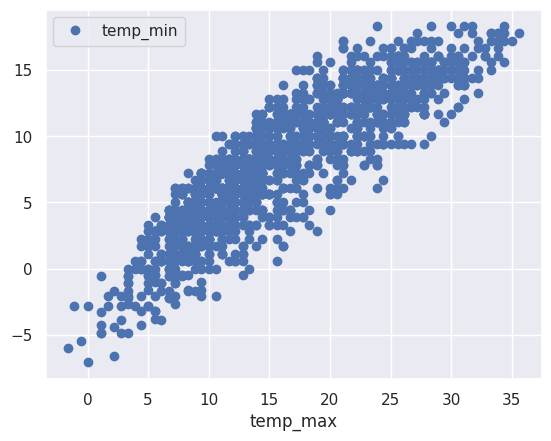

In [70]:
data.plot('temp_max','temp_min',style='o')

In [71]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

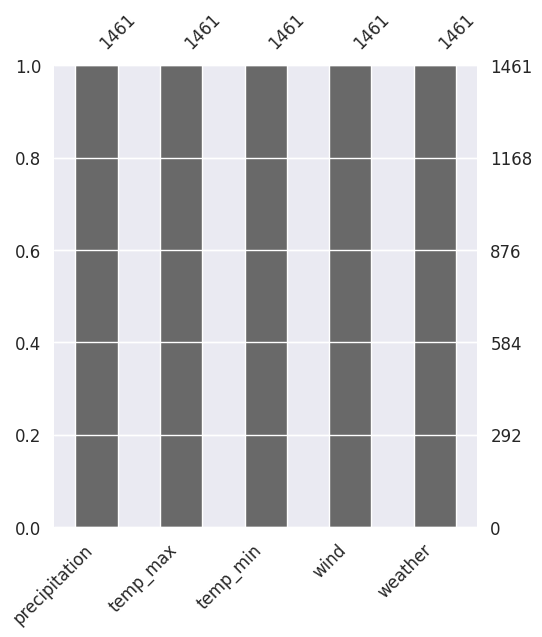

In [72]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(['date'],axis=1),ax=axz,fontsize=12)

In [73]:
import pandas as pd

# Check if 'date' column exists in the DataFrame
if 'date' in data.columns:

    data = data.drop(columns=['date'], errors='ignore')
else:
    print("The 'date' column does not exist in the DataFrame.")


In [74]:

data = data.apply(pd.to_numeric, errors='coerce')

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [75]:
import numpy as np
data.precipitation=np.sqrt(data.precipitation)
data.wind=np.sqrt(data.wind)

<Axes: xlabel='wind', ylabel='Count'>

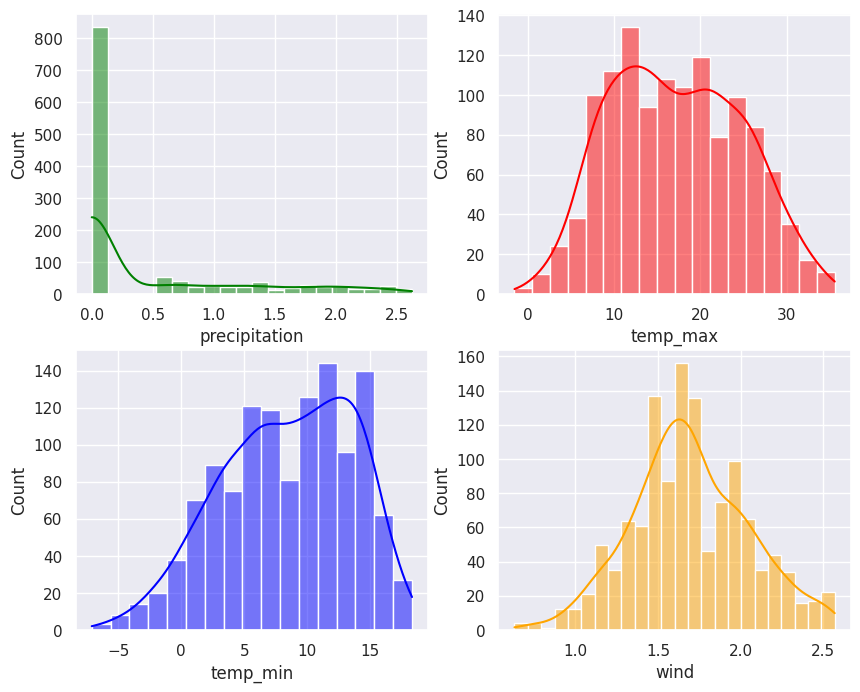

In [76]:
sns.set(style='darkgrid')
fig, axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='blue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

In [77]:
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,NaN
2,0.894427,11.7,7.2,1.516575,NaN
4,1.140175,8.9,2.8,2.469818,NaN
5,1.581139,4.4,2.2,1.483240,NaN
6,0.000000,7.2,2.8,1.516575,NaN


In [78]:
lc=LabelEncoder()
data['weather']=lc.fit_transform(data['weather'])

In [79]:
data.head()


,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,0
4,1.140175,8.9,2.8,2.469818,0
5,1.581139,4.4,2.2,1.483240,0
6,0.000000,7.2,2.8,1.516575,0


In [80]:
x=((data.loc[:,data.columns!='weather']).astype(int)).values[:,0:]
y=data['weather'].values

In [81]:
data.weather.unique()

array([0])

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [83]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%'.format(knn.score(x_test,y_test)*100))


KNN accuracy:100.00%


In [87]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('GBC accuracy:{:.2f}%'.format(gbc.score(x_test,y_test)*100))

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [88]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('XGB accuracy:{:.2f}%'.format(xgb.score(x_test,y_test)*100))

XGB accuracy:100.00%


In [36]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')


the weather is:
rain


In [37]:
import pickle
file = 'model.pkl'
pickle.dump(xgb, open(file, 'wb'))